In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Verificar se o DataFrame possui linhas repetidas e realizar a exclusão delas

In [9]:
df.duplicated().sum()

723

In [11]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [12]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

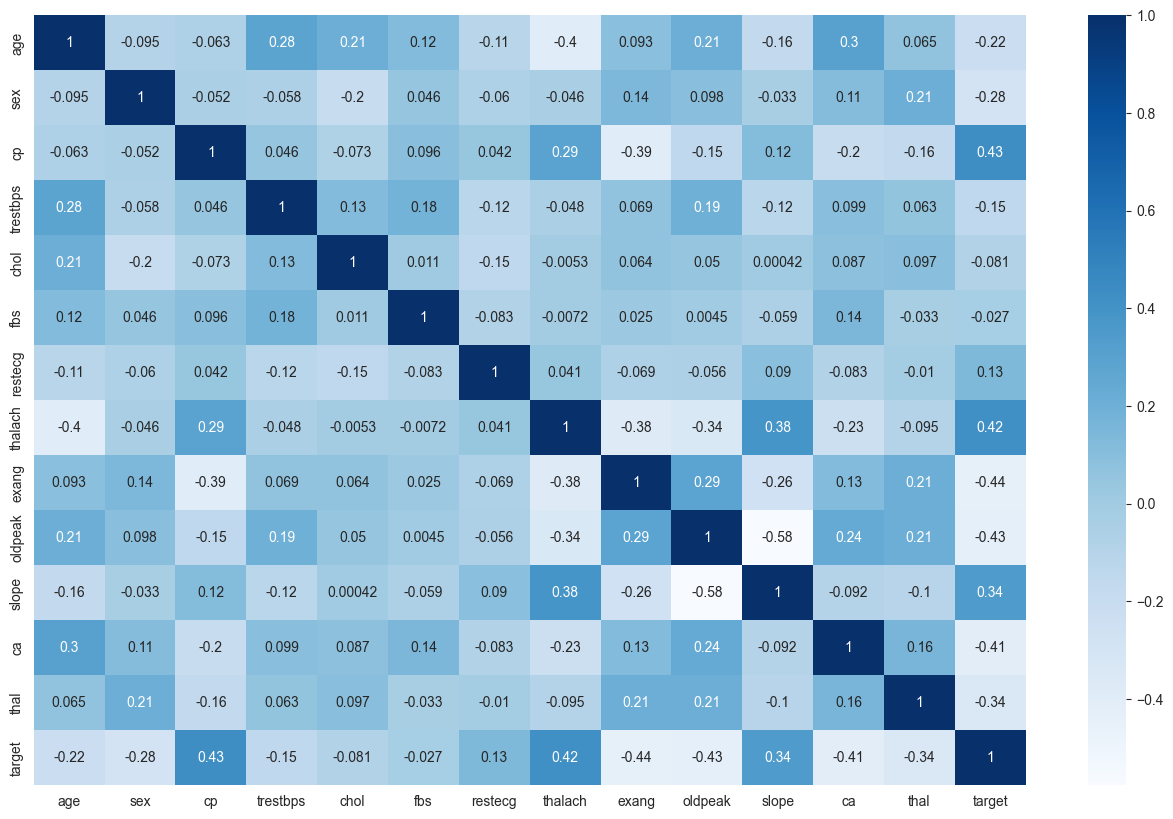

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(hd.corr(), annot=True, cmap='Blues')

In [15]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [18]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
for c in hd.columns:
    print(f'{c}: {hd[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [22]:
categoricas = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal']
numericas = ['age','trestbps','chol', 'thalach', 'oldpeak']

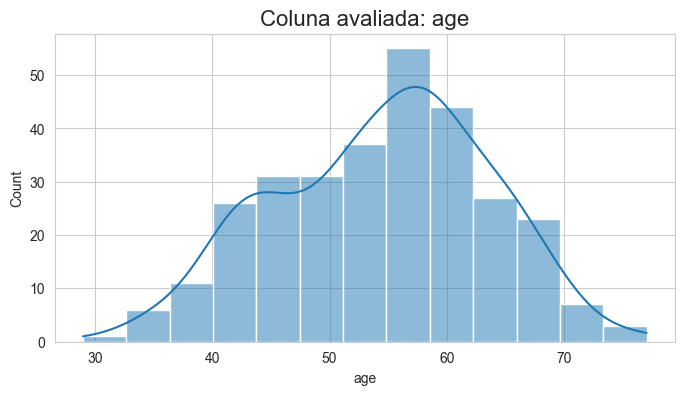

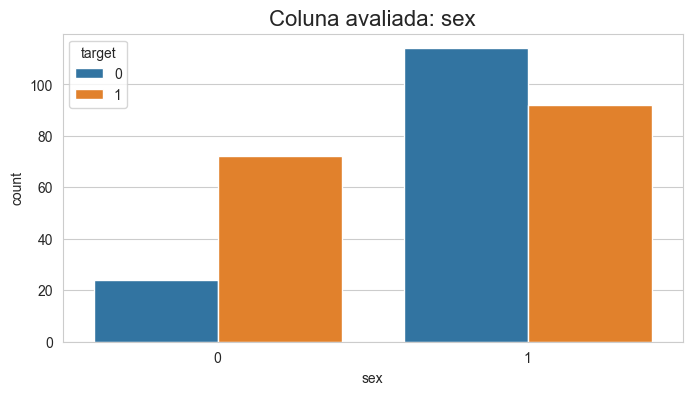

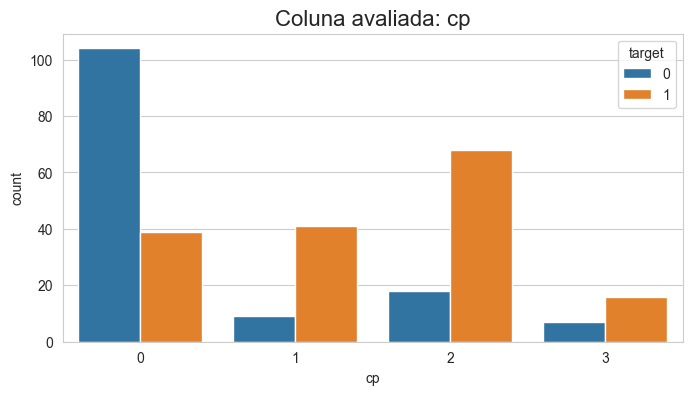

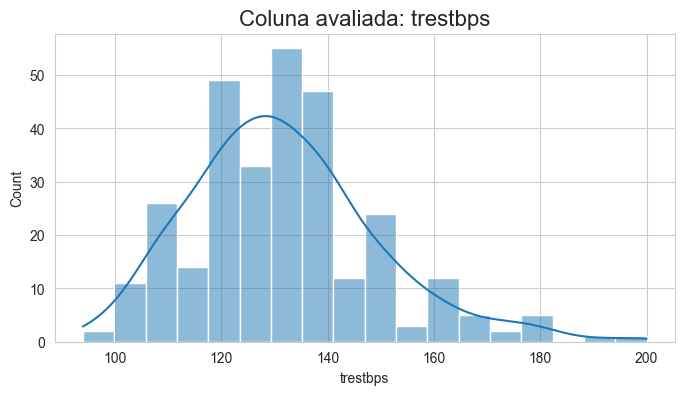

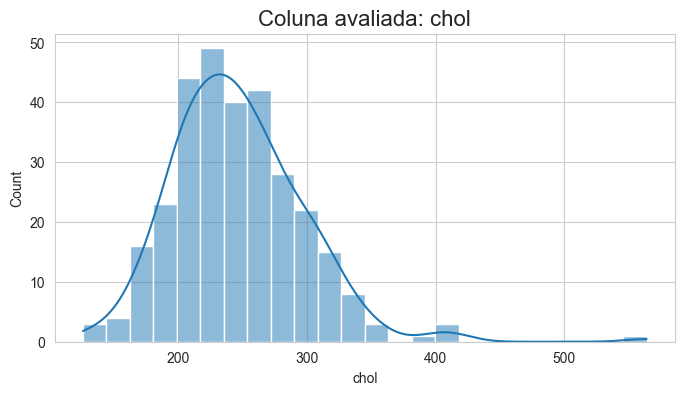

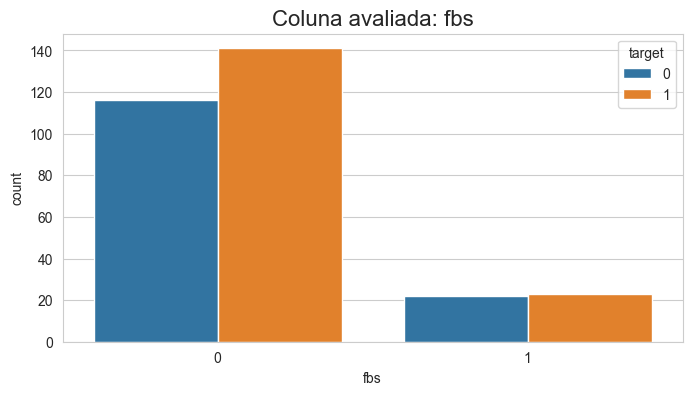

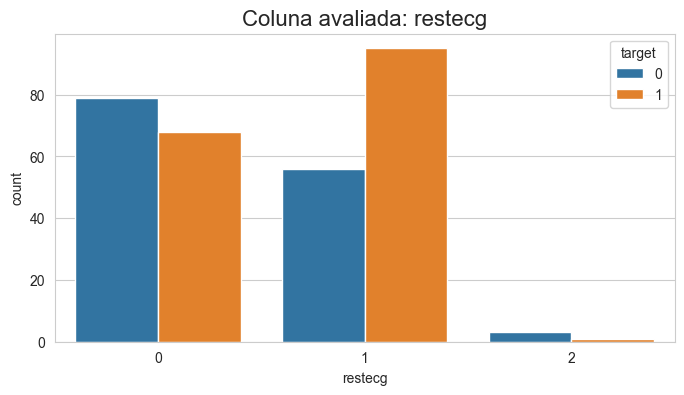

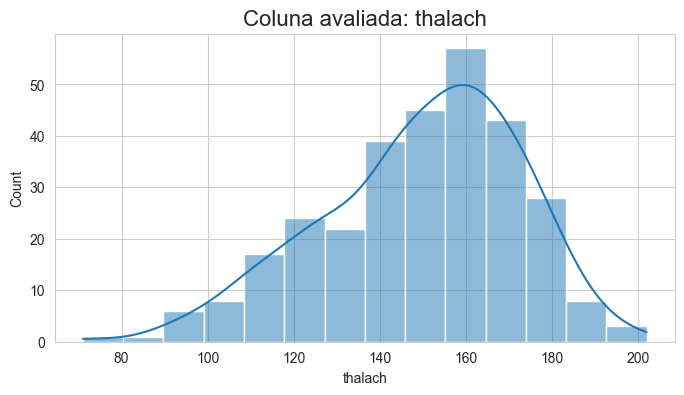

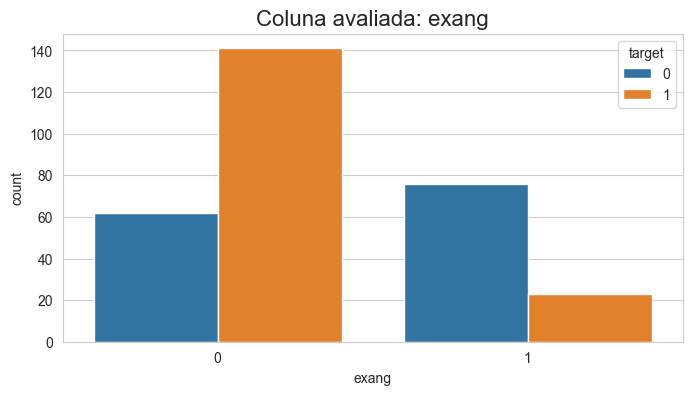

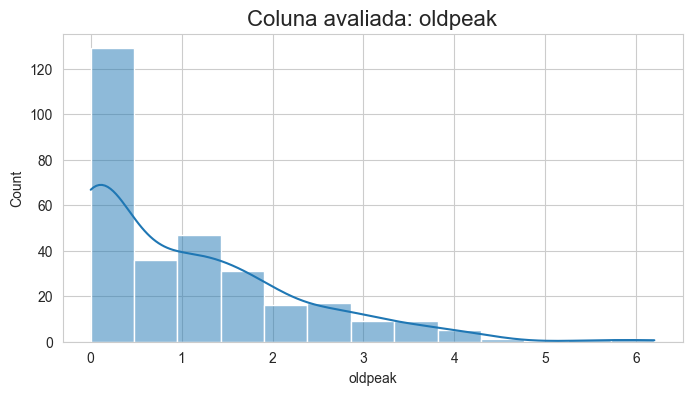

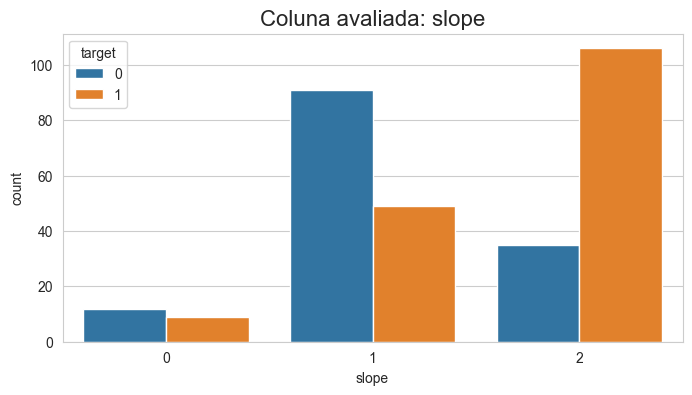

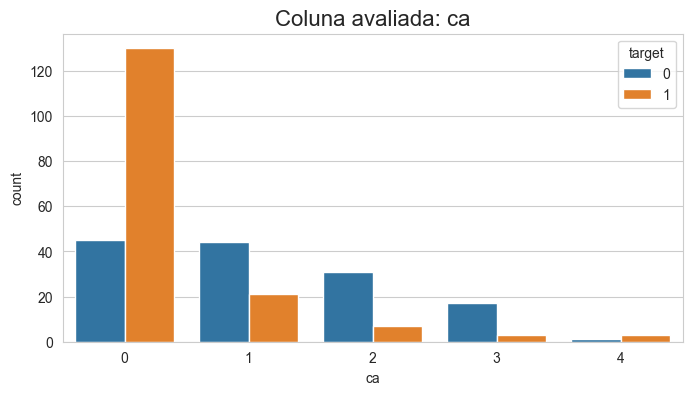

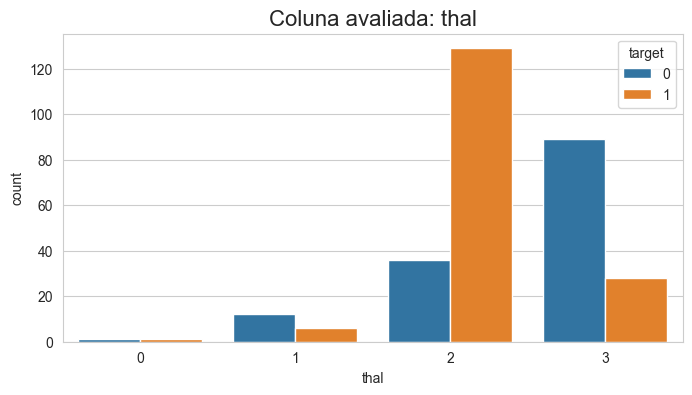

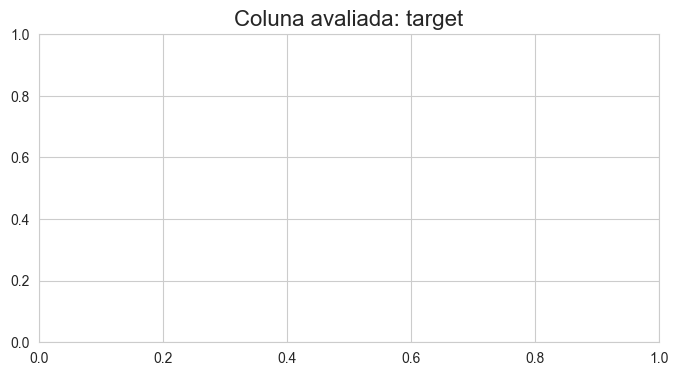

In [27]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f'Coluna avaliada: {c}', fontsize = 16)
    if c in categoricas:
        sns.countplot(x = hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

### Removendo Outliers

<Axes: >

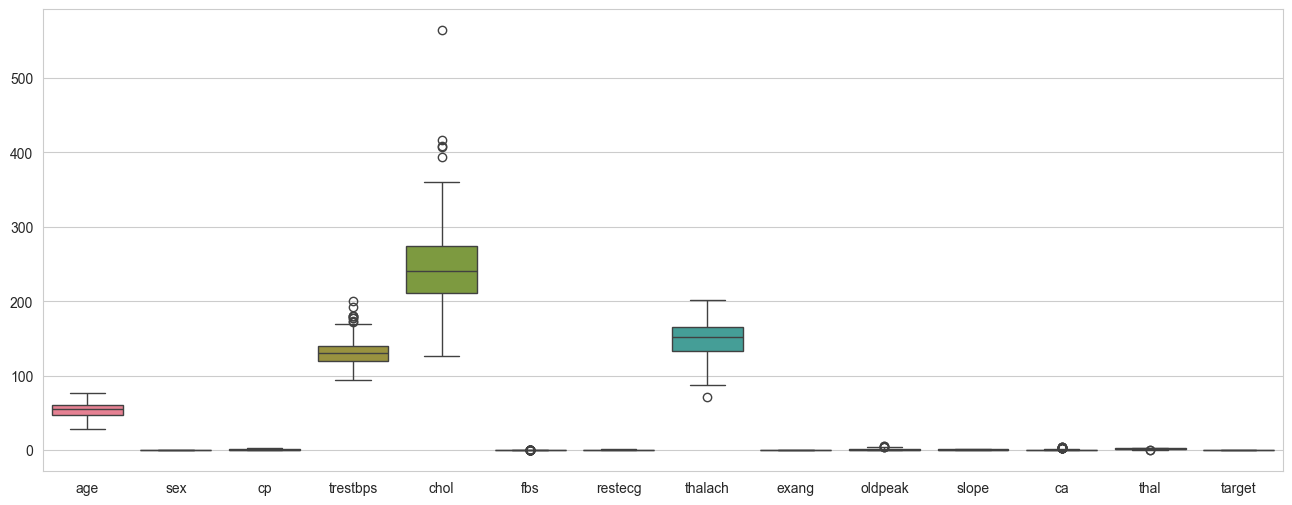

In [31]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd)

In [32]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


O método `quantile()` em pandas é usado para calcular o valor do quantil da distribuição dos dados de uma determinada coluna do DataFrame. Em estatística, um quantil é um ponto de corte que divide a distribuição de uma variável em intervalos contínuos de probabilidades iguais, ou em alguns casos, divide os dados observados em grupos de aproximadamente o mesmo número de observações. Os quantis são frequentemente expressos em termos de percentis.

Por exemplo, o quantil 0.5 é o valor abaixo do qual 50% dos dados podem ser encontrados. Este é também conhecido como a mediana da distribuição. Da mesma forma, o quantil 0.25 é o valor abaixo do qual 25% dos dados caem (1º quartil), e o quantil 0.75 é o valor abaixo do qual 75% dos dados caem (3º quartil).

Quando você chama `hd['trestbps'].quantile(q)` sem especificar um valor para `q`, ele, por padrão, calcula o quantil de 0.5 (a mediana). Se você quiser calcular um quantil diferente, você pode passar um número entre 0 e 1 para o parâmetro `q`. Por exemplo, `hd['trestbps'].quantile(0.25)` calcularia o 1º quartil dos valores da coluna 'trestbps' no DataFrame 'hd'.

Aqui está um exemplo de como você pode usar o `quantile()`:

```python
# Para calcular o quartil inferior (25%)
q1 = hd['trestbps'].quantile(0.25)

# Para calcular a mediana (50%)
median = hd['trestbps'].quantile(0.5)

# Para calcular o quartil superior (75%)
q3 = hd['trestbps'].quantile(0.75)
```

Esses valores são frequentemente usados em análises estatísticas para entender a distribuição dos dados, identificar outliers ou calcular o intervalo interquartil (IQR), que é a diferença entre o terceiro e o primeiro quartil (Q3 - Q1).

In [34]:
hd['trestbps'].quantile(0.99)

180.0

In [42]:
# Mudando o nome da variável para não alterar o DF original
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Veremos se removeu o outliers

<Axes: >

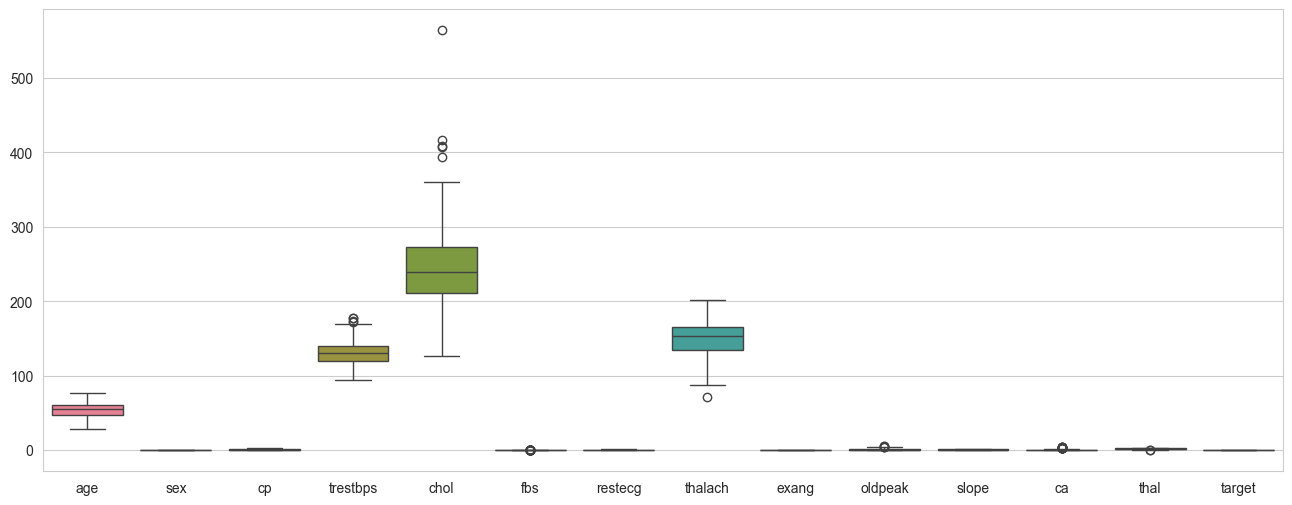

In [41]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [43]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [54]:
# Tudo que estiver no hd1, na coluna 'chol' que for menor que o valor 354.4799999999999
# Agora passamos como hd2
# Tiramos apenas 2%
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]

<Axes: >

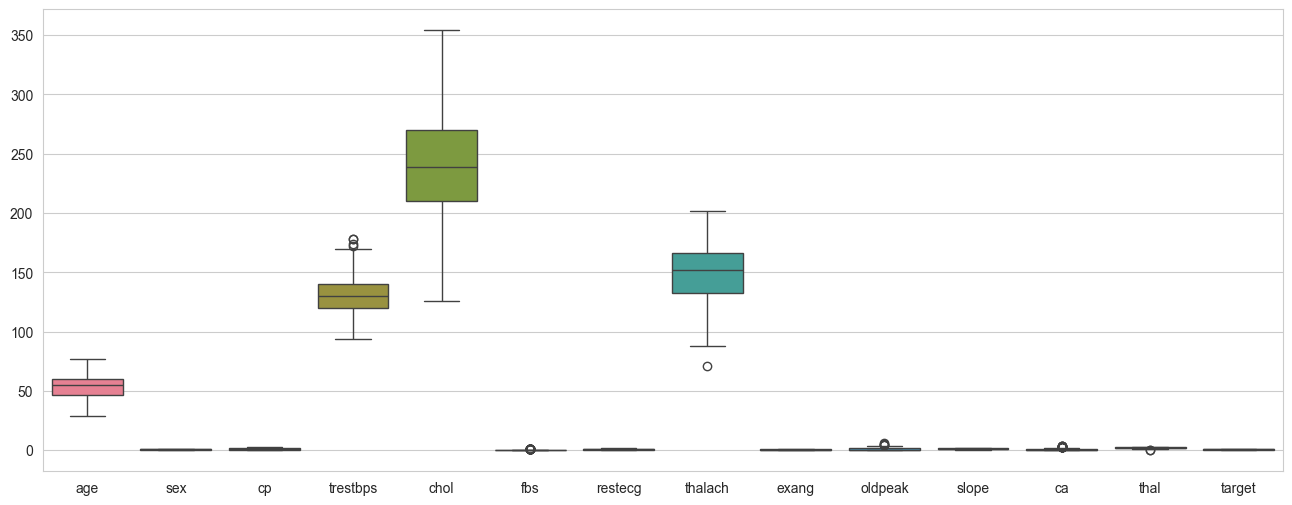

In [55]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd2)

In [56]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
hd2['thalach'].quantile(0.005)

88.9

In [62]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]

<Axes: >

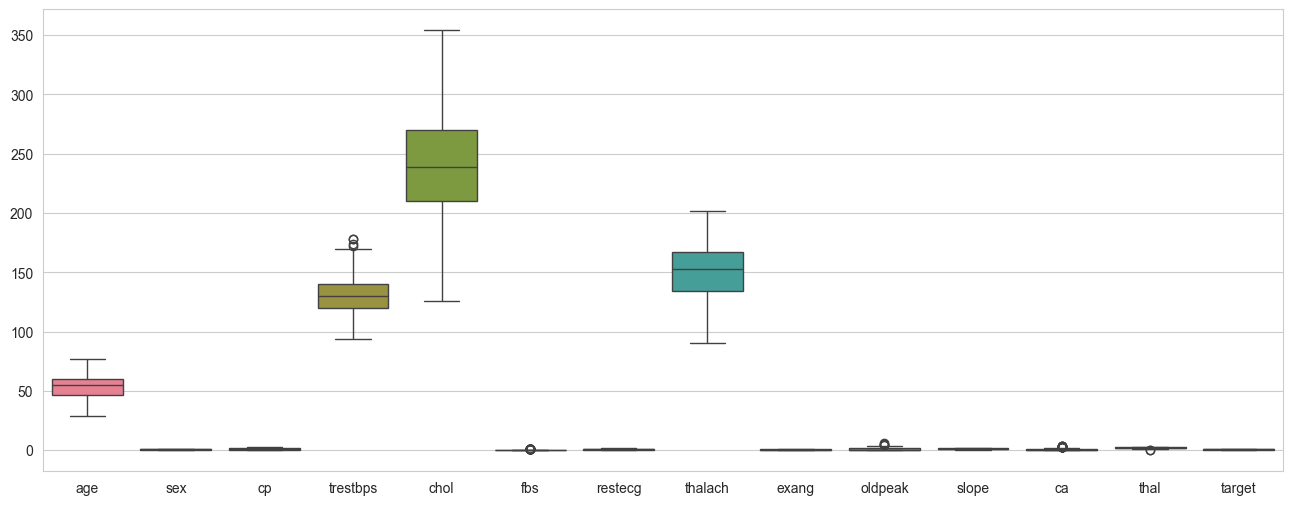

In [63]:
plt.figure(figsize = (16,6))
sns.boxplot(data = hd3)

In [64]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
categoricas = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal']
numericas = ['age','trestbps','chol', 'thalach', 'oldpeak']

### Começar a modelar para treinar os modelos de ML

O método `pd.get_dummies()` é uma função do pandas que é usada para converter variáveis categóricas em variáveis dummy/indicadoras. Variáveis dummy são variáveis binárias (0 ou 1) que são criadas para representar as categorias de uma variável categórica em termos numéricos que podem ser utilizados em modelos estatísticos e de machine learning.

Quando aplicado a um DataFrame, o método `get_dummies` converte cada categoria única em uma nova coluna, onde:

- **1** indica a presença daquela categoria na observação.
- **0** indica ausência.

Esse processo é conhecido como "one-hot encoding" e é essencial para modelos de machine learning que só podem trabalhar com dados numéricos.

No exemplo, `pd.get_dummies(hd3, columns = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal'])`, a função está criando variáveis dummy para as colunas listadas. Por exemplo, se a coluna 'sex' contém duas categorias, como masculino e feminino, ela será substituída por duas novas colunas, digamos 'sex_male' e 'sex_female', onde uma delas terá um "1" se a observação for masculina e "0" se não for, e vice-versa para a outra coluna.

Após aplicar o `get_dummies`, o DataFrame `hd4` terá colunas adicionais correspondentes a todas as categorias únicas das variáveis especificadas, facilitando a modelagem estatística ou de aprendizado de máquina dos dados.

In [67]:
hd4 = pd.get_dummies(hd3, columns = ['sex','cp','fbs','restecg','exang','slope', 'ca', 'thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


O método `StandardScaler` é uma técnica de pré-processamento de dados usada para normalizar a distribuição dos dados. Este método é implementado na biblioteca `scikit-learn` de Python e é comumente utilizado em algoritmos de machine learning, especialmente aqueles que são sensíveis à variação nas escalas dos dados, como Support Vector Machines (SVMs), regressão logística e redes neurais.

### O que o `StandardScaler` faz?

O `StandardScaler` ajusta a distribuição de cada atributo para ter uma média de zero (centrado em torno de 0) e um desvio padrão de um (normalizado). Isso é feito subtraindo a média e dividindo pelo desvio padrão para cada valor de cada variável. Matematicamente, a fórmula para o escalonamento padrão de um valor $ x $ é:

$
z = \frac{(x - \mu)}{\sigma}
$

Onde:
- $ z $ é o valor escalonado (normalizado).
- $ x $ é o valor original.
- $ \mu $ é a média dos valores do atributo.
- $ \sigma $ é o desvio padrão dos valores do atributo.

### Por que usar o `StandardScaler`?

A normalização dos dados é importante por várias razões:

- **Escala**: Algoritmos que calculam distâncias ou assumem normalidade são afetados quando os atributos estão em escalas variadas.
- **Velocidade de Convergência**: Em algoritmos de otimização (como gradient descent), ter características na mesma escala pode acelerar a convergência.
- **Interpretabilidade**: Coeficientes de modelos lineares podem ser mais facilmente interpretados quando os atributos estão na mesma escala.

### Exemplo de uso do `StandardScaler`:

```python
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suponha que temos um conjunto de dados com duas características
data = np.array([[0, 10], [1, 11], [2, 12], [3, 13]])

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Ajuste aos dados e transforme-os
scaled_data = scaler.fit_transform(data)

# `scaled_data` agora terá média de 0 e desvio padrão de 1 para cada coluna
print(scaled_data)
```

O resultado será uma versão normalizada do conjunto de dados `data`, onde cada coluna terá uma média de aproximadamente zero e um desvio padrão de um.

Ao aplicar `StandardScaler`, é importante ajustar o escalonador apenas aos dados de treinamento e depois aplicar a mesma transformação aos dados de teste para garantir que os modelos aprendam corretamente as características sem serem influenciados por possíveis diferenças na escala dos dados de teste.

In [68]:
hd4['chol'].max(), hd4['chol'].min()

(354, 126)

In [69]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [77]:
# Todas as colunas, menos a Target
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [78]:
# Mostrar os comandos do método de treino
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [76]:
#Usar somente 
# X_train, X_test, y_train, y_test = train_test_split(
#    ...     X, y, test_size=0.33, random_state=42)

In [105]:
# Deixar o test_size em 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,54,110,206,108,0.0,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
74,48,130,256,150,0.0,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
71,61,140,207,138,1.9,False,True,True,False,False,...,True,False,True,False,False,False,False,False,False,True
94,62,128,208,140,0.0,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
26,44,130,233,179,0.4,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,True,False,False,False,True,...,True,True,False,False,False,False,False,False,False,True
80,50,140,233,163,0.6,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
129,57,140,192,148,0.4,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
599,63,140,195,179,0.0,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [107]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
50,58,150,283,162,1.0,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
220,57,130,236,174,0.0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
628,69,140,239,151,1.8,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
47,66,178,228,165,1.0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
271,44,120,263,173,0.0,False,True,False,True,False,...,True,True,False,False,False,False,False,False,False,True
9,54,122,286,116,3.2,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
51,57,140,241,123,0.2,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
252,55,132,353,132,1.2,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,True
90,54,108,267,167,0.0,True,False,False,False,True,...,True,True,False,False,False,False,False,False,True,False
300,46,105,204,172,0.0,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [108]:
# Fazendo todo o teste no DataFrame de teste

In [109]:
# Mudando a porcentagem do test_size para 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [110]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
12,34,118,210,192,0.7,True,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
38,64,128,263,105,0.2,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,True
30,44,120,169,144,2.8,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
190,41,112,250,179,0.0,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
376,59,140,221,164,0.0,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,64,140,313,133,0.2,True,False,False,False,True,...,True,True,False,False,False,False,False,False,False,True
80,50,140,233,163,0.6,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
129,57,140,192,148,0.4,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
599,63,140,195,179,0.0,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


#### Começando a utilizar algum algoritmo
##### Selecionando o "LogisticRegression"

In [111]:
# Definindo o número máximo de iterações
log = LogisticRegression(max_iter=1000)

In [112]:
# Agora veremos a acurácia quando analisa os dados de treino e compara com as respostas
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
log.score(X_train, y_train)

0.8680555555555556

In [114]:
log.score(X_test, y_test)

0.8344827586206897

In [115]:
# Previsão
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [116]:
accuracy_score(y_test, y_previsto)

0.8344827586206897

In [117]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        65
           1       0.80      0.93      0.86        80

    accuracy                           0.83       145
   macro avg       0.85      0.82      0.83       145
weighted avg       0.84      0.83      0.83       145



In [118]:
confusion_matrix(y_test, y_previsto)

array([[47, 18],
       [ 6, 74]], dtype=int64)



--- 


In [181]:
# Função para chamarmos o algoritmo de ML
def relatorio_ml(df, algoritmo, opt = 2):
    X = hd4.drop('target', axis = 1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia teste: {score_test * 100:.2f}%')

    y_previsto = log.predict(X_test)
    print('------------CLASSIFICATION REPORT------------')
    print(classification_report(y_test, y_previsto))
    print('------------CONFUSION MATRIX-----------------')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')

    return score_train, score_test

Acurácia treino: 87.45%
Acurácia teste: 84.48%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

------------CONFUSION MATRIX-----------------


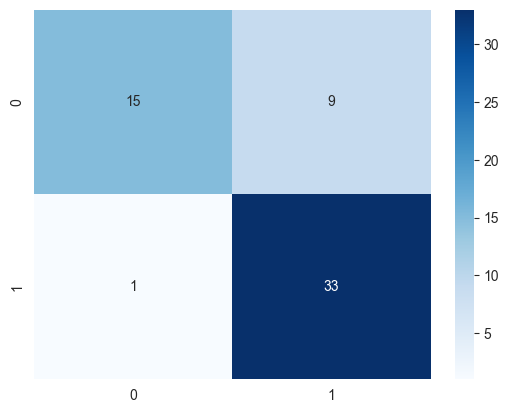

In [183]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 70.69%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

------------CONFUSION MATRIX-----------------


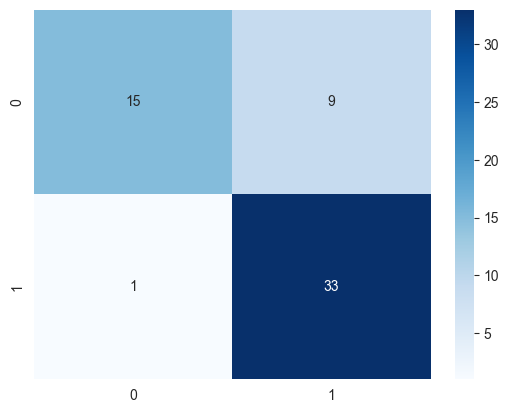

In [184]:
# Utilizando árvores de decisão
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia teste: 82.76%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

------------CONFUSION MATRIX-----------------


C:\Users\User\jupyter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


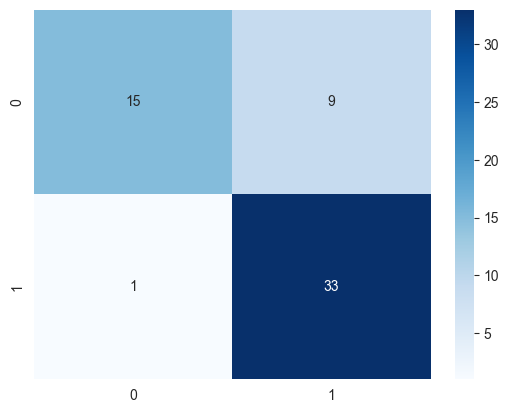

In [185]:
# Utilizando o AdaBoost
# Está defasado, irá aparecer um erro
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)

In [143]:
# Alterar para: 
from sklearn.ensemble import AdaBoostClassifier

# Crie um objeto classificador AdaBoost com o algoritmo SAMME
# Substitua os parâmetros do construtor pelos que você está usando, se houver
ada_clf = AdaBoostClassifier(algorithm='SAMME')

Acurácia treino: 77.06%
Acurácia teste: 60.34%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

------------CONFUSION MATRIX-----------------


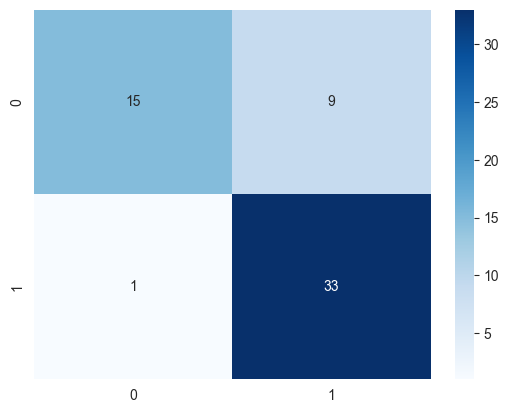

In [186]:
# Utilizando o KNeighbors
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 79.31%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.79      0.97      0.87        34

    accuracy                           0.83        58
   macro avg       0.86      0.80      0.81        58
weighted avg       0.85      0.83      0.82        58

------------CONFUSION MATRIX-----------------


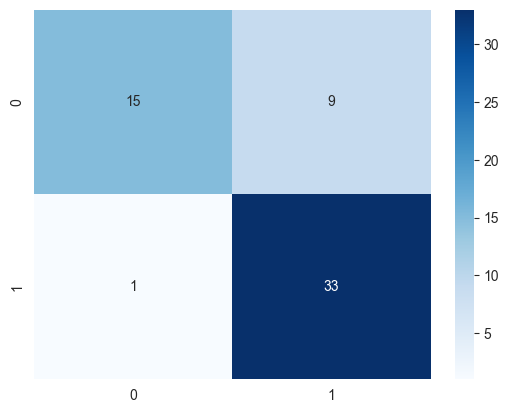

In [187]:
# Utilizando o RandomForest
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

## Utilizando o StandardScaler

In [188]:
# Função para chamarmos o algoritmo de ML
def relatorio_ml(df, algoritmo, opt = 2):
    X = hd4.drop('target', axis = 1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    cols_scaler = ['age','trestbps','chol', 'thalach', 'oldpeak']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acurácia teste: {score_test * 100:.2f}%')

    y_previsto = ml.predict(X_test)
    print('------------CLASSIFICATION REPORT------------')
    print(classification_report(y_test, y_previsto))
    print('------------CONFUSION MATRIX-----------------')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')

    return score_train, score_test

Acurácia treino: 87.45%
Acurácia teste: 84.48%
------------CLASSIFICATION REPORT------------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

------------CONFUSION MATRIX-----------------


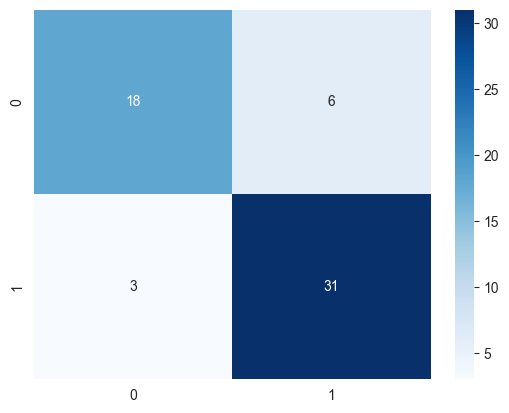

In [189]:
log_train_scaler, log_test_scaler = relatorio_ml(hd4, LogisticRegression, opt = 0)

In [190]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
109,0.037193,-1.284776,-0.749780,-1.848487,-0.901757,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
74,-0.623695,0.005025,0.330285,0.001907,-0.901757,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
71,0.808228,0.649926,-0.728179,-0.526777,0.741170,False,True,True,False,False,...,True,False,True,False,False,False,False,False,False,True
94,0.918376,-0.123955,-0.706578,-0.438663,-0.901757,False,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
26,-1.064287,0.005025,-0.166545,1.279561,-0.555878,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.138672,0.649926,1.561559,-0.747062,-0.728818,True,False,False,False,True,...,True,True,False,False,False,False,False,False,False,True
80,-0.403399,0.649926,-0.166545,0.574648,-0.382938,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
129,0.367637,0.649926,-1.052198,-0.086207,-0.555878,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
599,1.028524,0.649926,-0.987394,1.279561,-0.901757,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


In [191]:
log_train_scaler = log_train
tree_train_scaler = tree_train
kn_train_scaler = kn_train
rand_train_scaler = rand_train
ada_train_scaler = ada_train

log_test_scaler = log_test
tree_test_scaler = tree_test
kn_test_scaler = kn_test
rand_test_scaler = rand_test
ada_test_scaler = ada_test

In [192]:
# Construindo o dicionário com os resultados
data_scaler = {
    'Modelos': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
    'Acurácia Treino': [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2), round(rand_train_scaler * 100, 2), round(ada_train_scaler * 100, 2)],
    'Acurácia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2), round(rand_test_scaler * 100, 2), round(ada_test_scaler * 100, 2)],
}

# Criando o DataFrame
df_scalar = pd.DataFrame(data_scaler)

# Ordenando os resultados por 'Acurácia Teste' do melhor para o menor
df_scalar.sort_values(by='Acurácia Teste', ascending=False, inplace=True)

# Exibindo o DataFrame ordenado
df_scalar

,Modelos,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
4,Ada Boost,93.51,82.76
3,Random Forest Classifier,100.00,79.31
1,Decision Tree,100.00,70.69
2,KNeighbors,77.06,60.34
